## Import the Library

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

import pickle

In [ ]:
df = pd.read_csv('loan_data.csv')

In [36]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [38]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


## EDA

In [39]:
df.nunique()

,0
person_age,60
person_gender,2
person_education,5
person_income,33989
person_emp_exp,63
person_home_ownership,4
loan_amnt,4483
loan_intent,6
loan_int_rate,1302
loan_percent_income,64


In [40]:
for x in df.columns:
  print(x)
  print(df[x].unique())
  print('------------------------------')

person_age
[ 22.  21.  25.  23.  24.  26. 144. 123.  20.  32.  34.  29.  33.  28.
  35.  31.  27.  30.  36.  40.  50.  45.  37.  39.  44.  43.  41.  46.
  38.  47.  42.  48.  49.  58.  65.  51.  53.  66.  61.  54.  57.  59.
  62.  60.  55.  52.  64.  70.  78.  69.  56.  73.  63.  94.  80.  84.
  76.  67. 116. 109.]
------------------------------
person_gender
['female' 'male']
------------------------------
person_education
['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
------------------------------
person_income
[71948. 12282. 12438. ... 31924. 56942. 33164.]
------------------------------
person_emp_exp
[  0   3   1   5   4   2   7   6 125   8 121 101 100  12  10   9  14  13
  11  15  16  17  19  28  25  18  24  22  20  23  21  31  26  27  29  32
  30 124  40  43  33  44  34  42  37  45  36  41  47  38  39  35  57  46
  49  48  50  76  62  61  58  93  85]
------------------------------
person_home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
-----------------------------

In [41]:
df.describe().style.background_gradient(cmap = "YlGnBu")

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,80319.053222,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,80422.498632,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8000.000000,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,47204.000000,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,67048.000000,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,95789.250000,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7200766.000000,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Person age and person emp experience had some outliers

## Categorical EDA

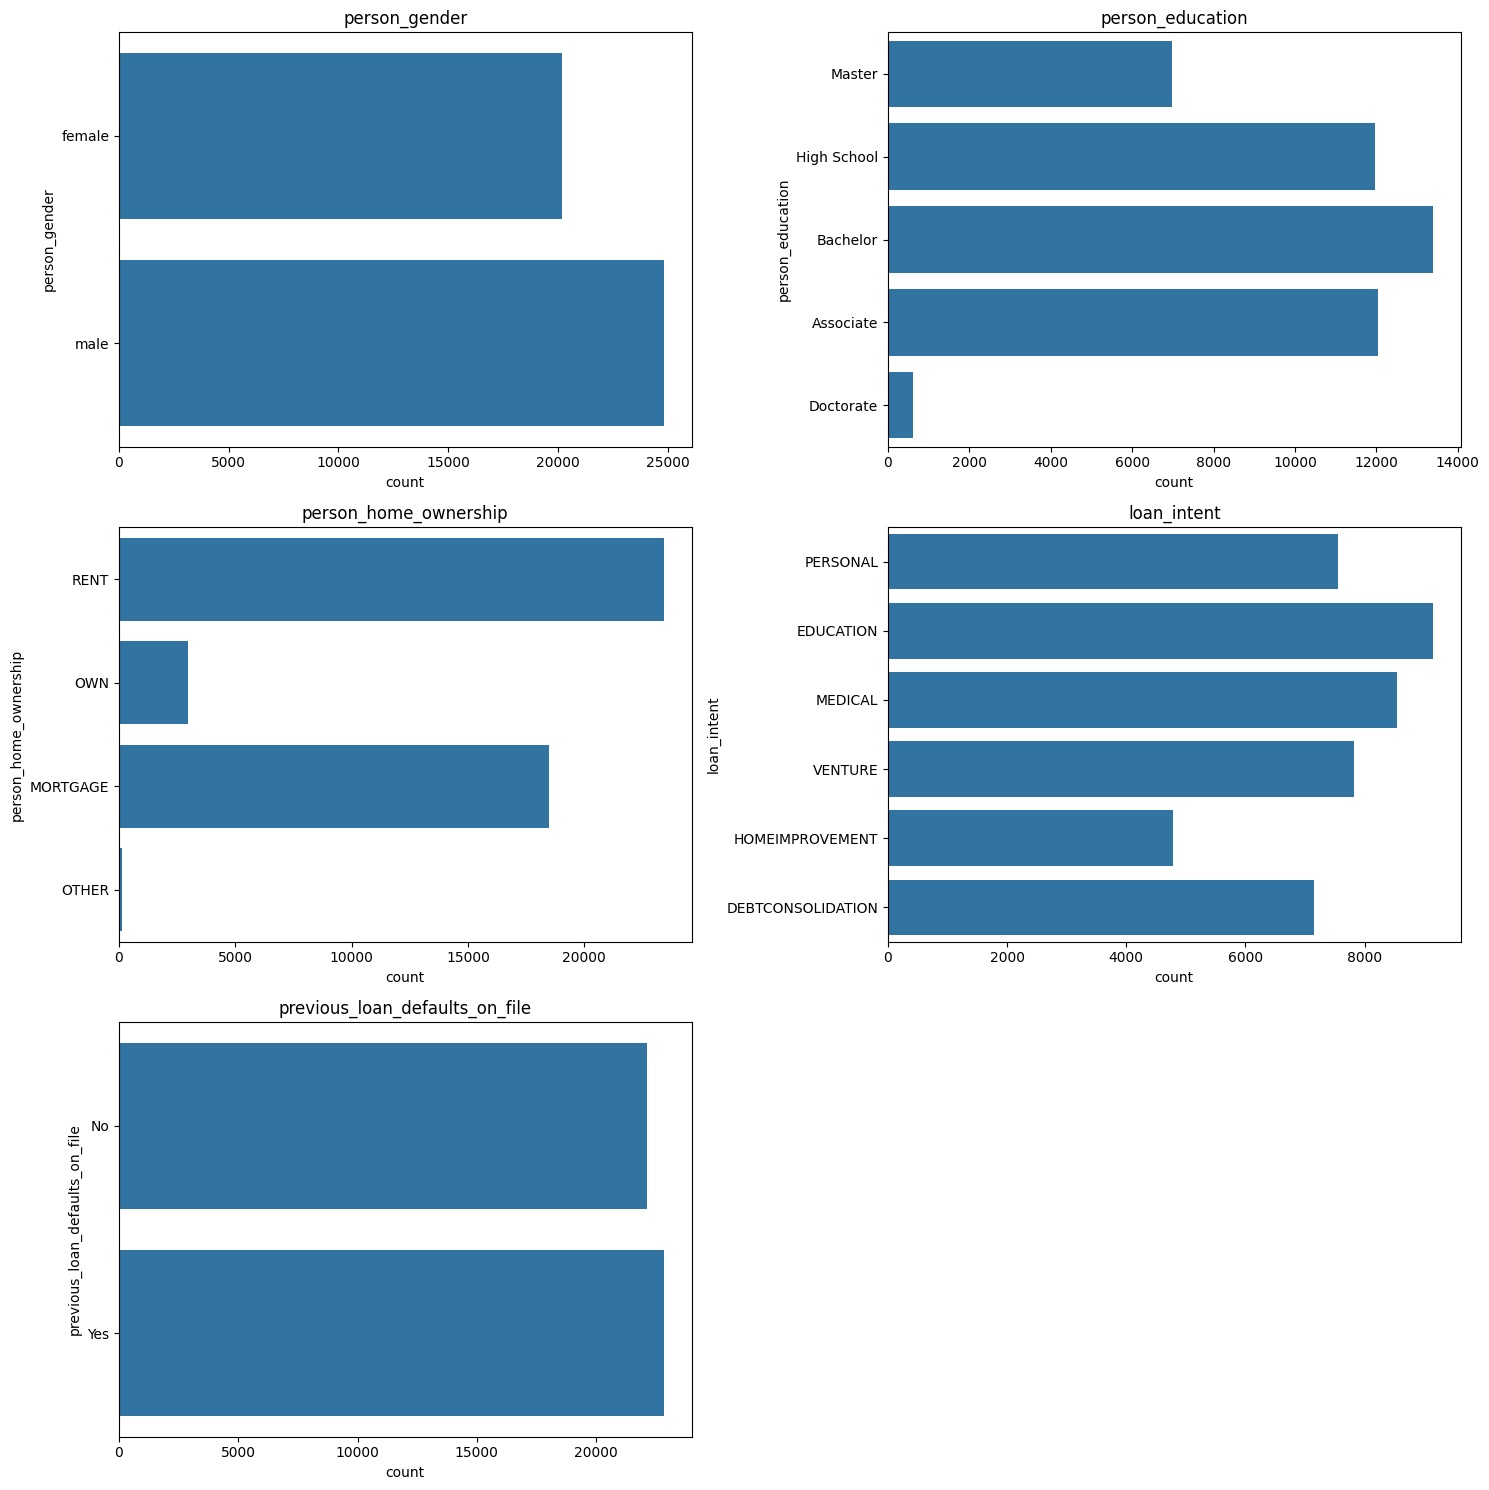

In [42]:
categorical_cols = df.select_dtypes(include='object').columns
n_cols = len(categorical_cols)
n_rows = (n_cols + 1) // 2  # Calculate number of rows needed (2 columns per row)

fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(categorical_cols):
    sns.countplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Which People Wants Loan
So the Trend I am seeing right now is that
The Person live in Rent , Education is High School and Bachelors is take loan , one more intresting fact is that the people mostly that want loan is for Educational Purposes

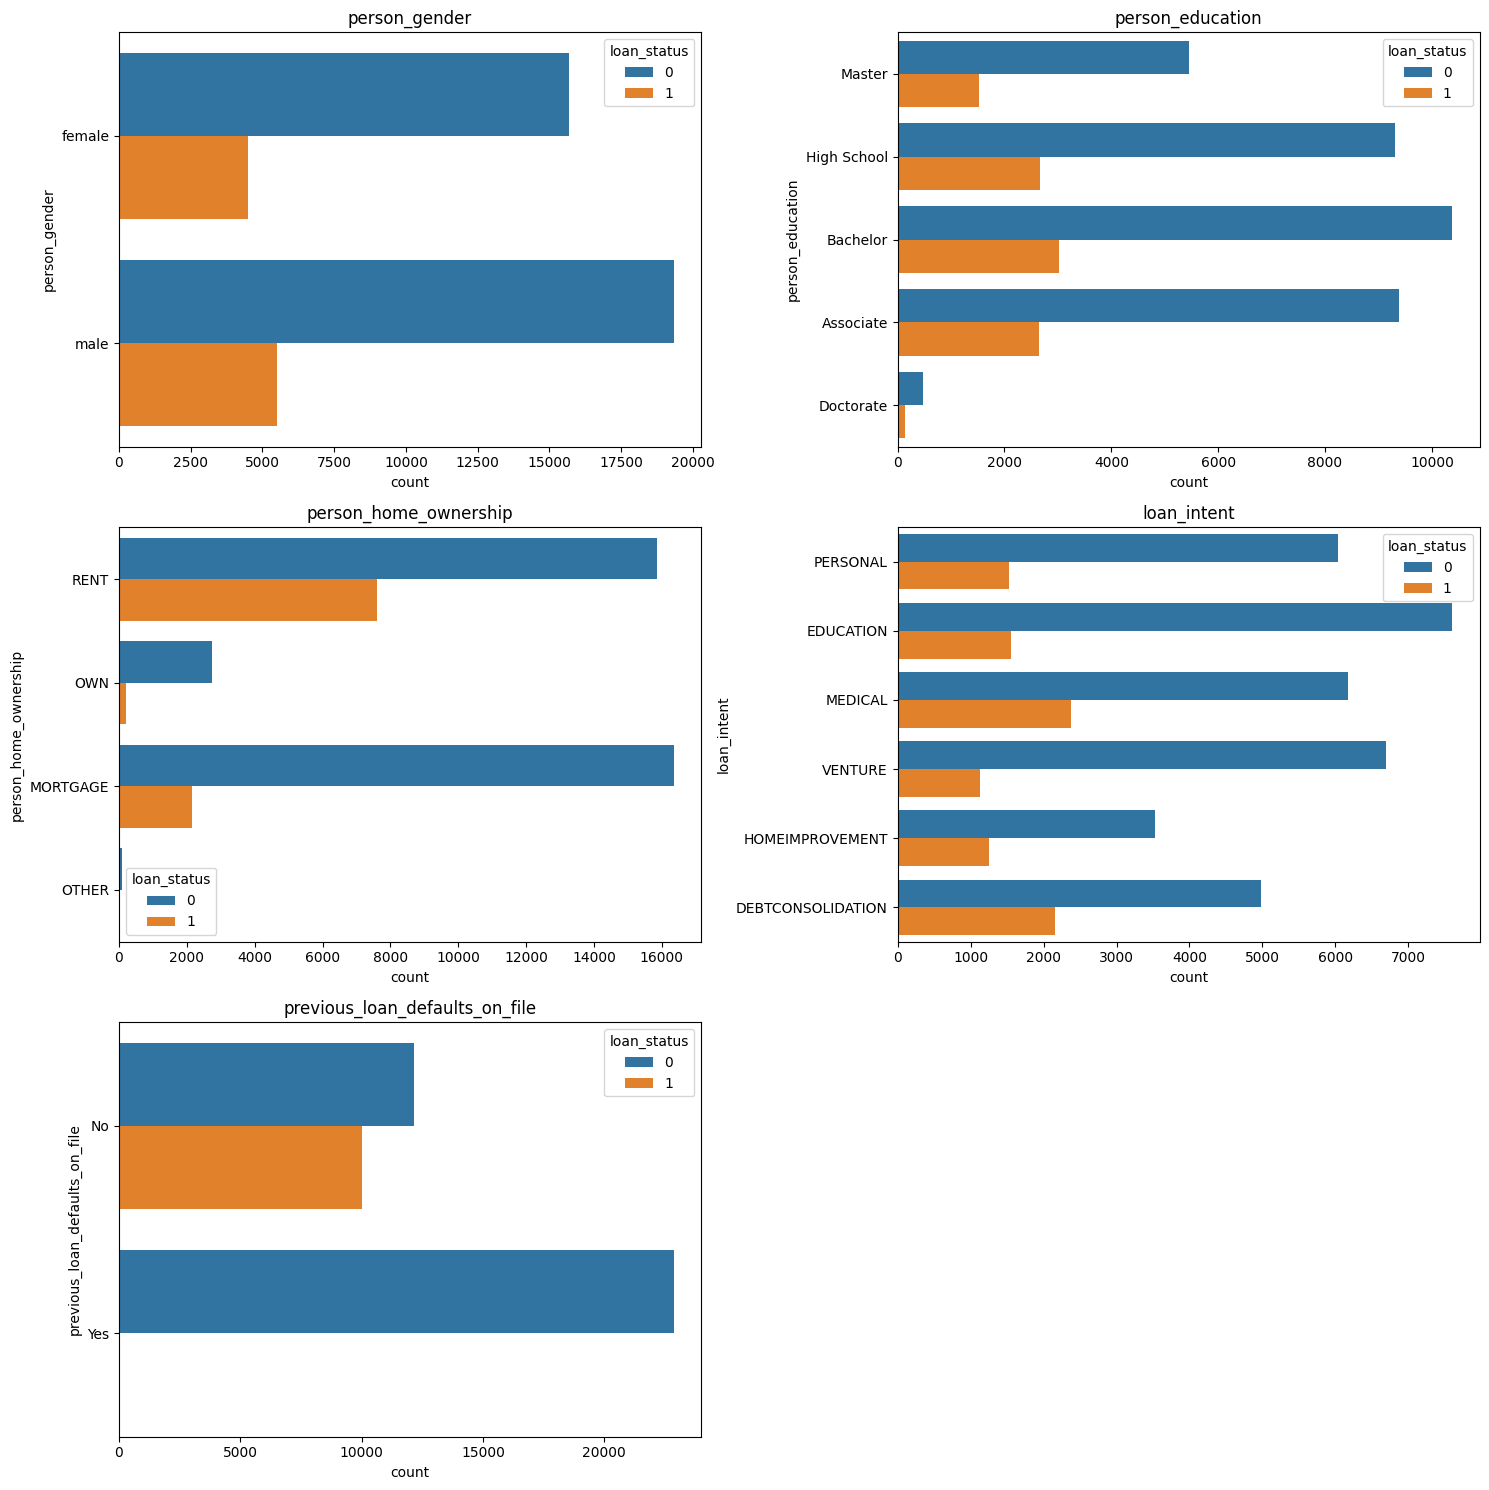

In [43]:
categorical_cols = df.select_dtypes(include='object').columns
n_cols = len(categorical_cols)
n_rows = (n_cols + 1) // 2  # Calculate number of rows needed (2 columns per row)

fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(categorical_cols):
    sns.countplot(y=df[col], hue=df['loan_status'], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Which People Loan Accepts
The persons live in Rent , in Moratge and having no previous files
and for Medical and DEBTCONSOLIDATION purposes there loan was mostly accepted

## Numerical EDA

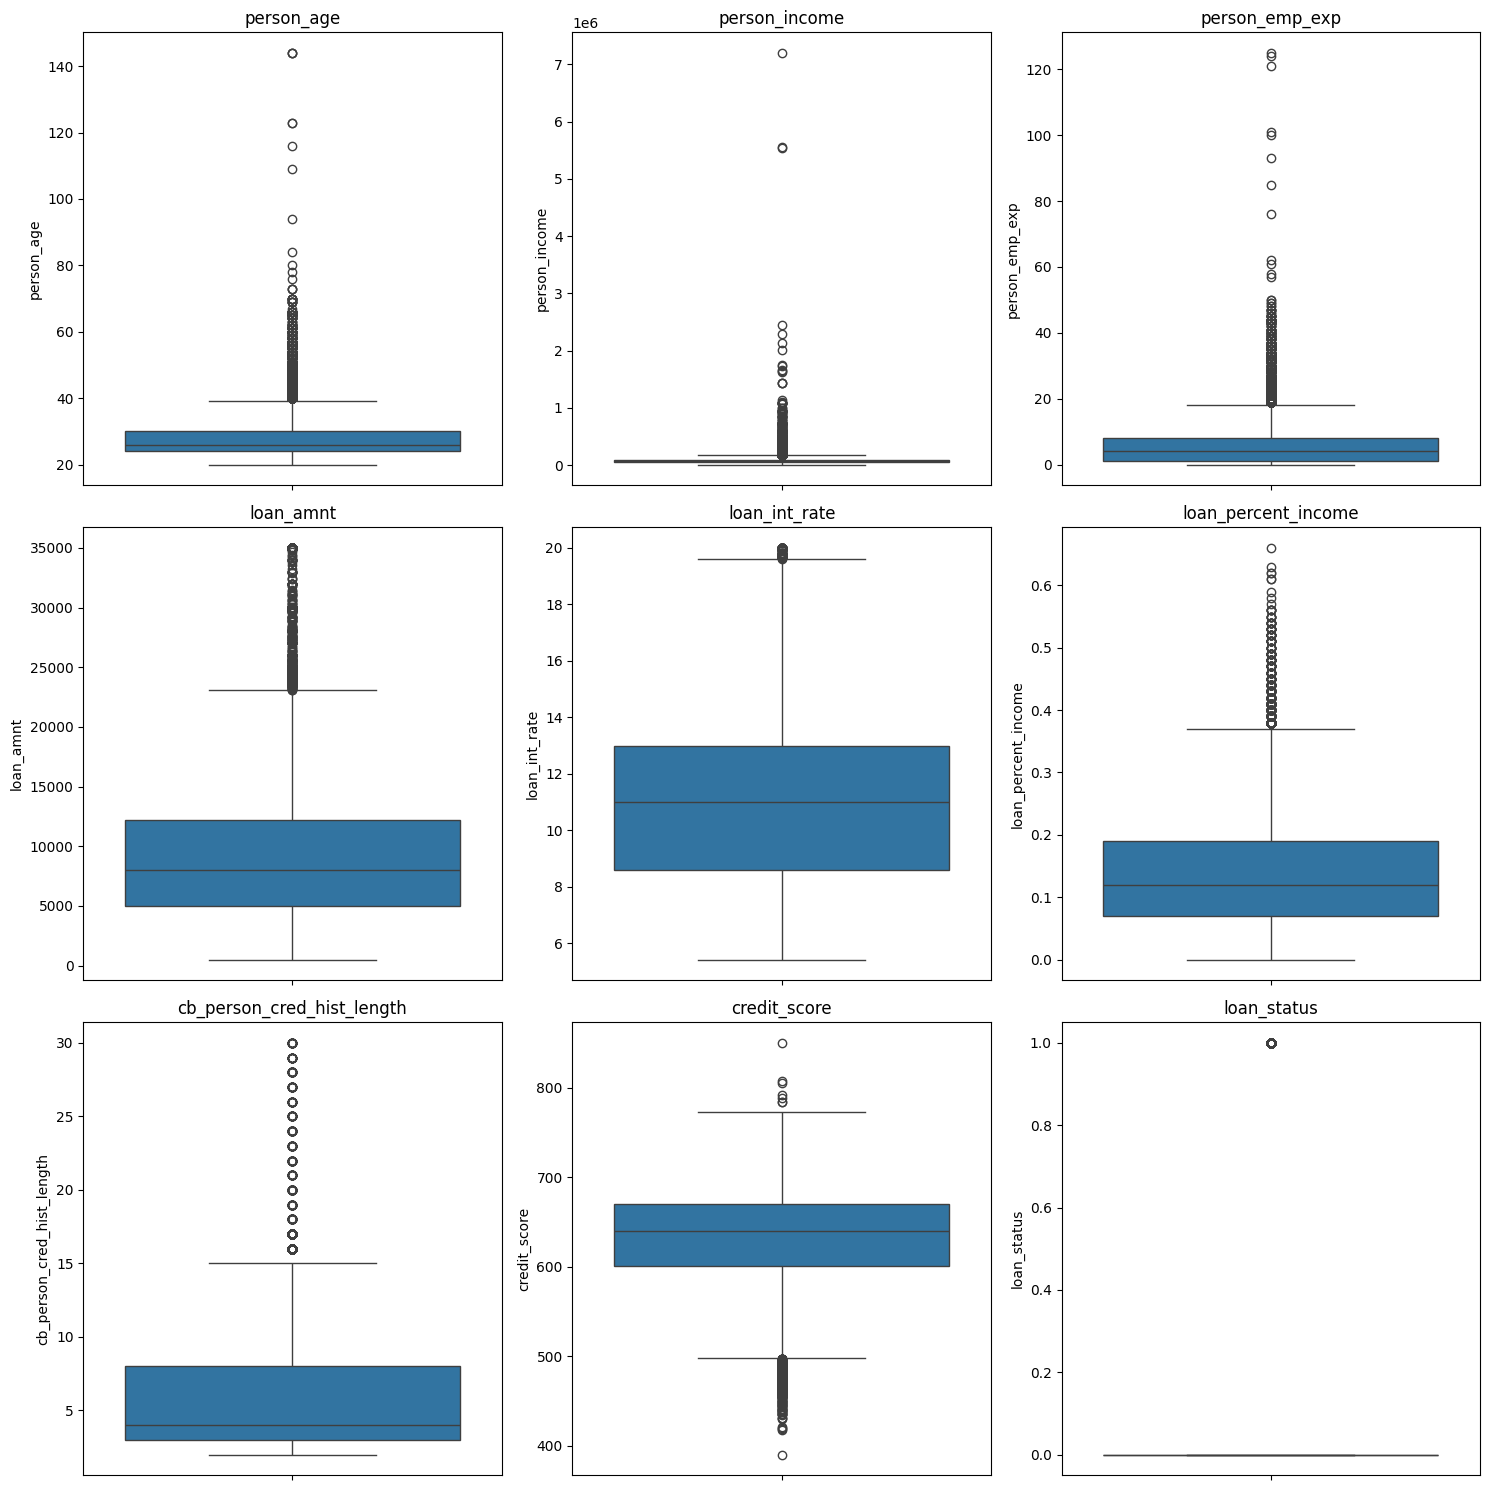

In [44]:
numerical_cols = df.select_dtypes(include='number').columns
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3  # Calculate number of rows needed (3 columns per row)

fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

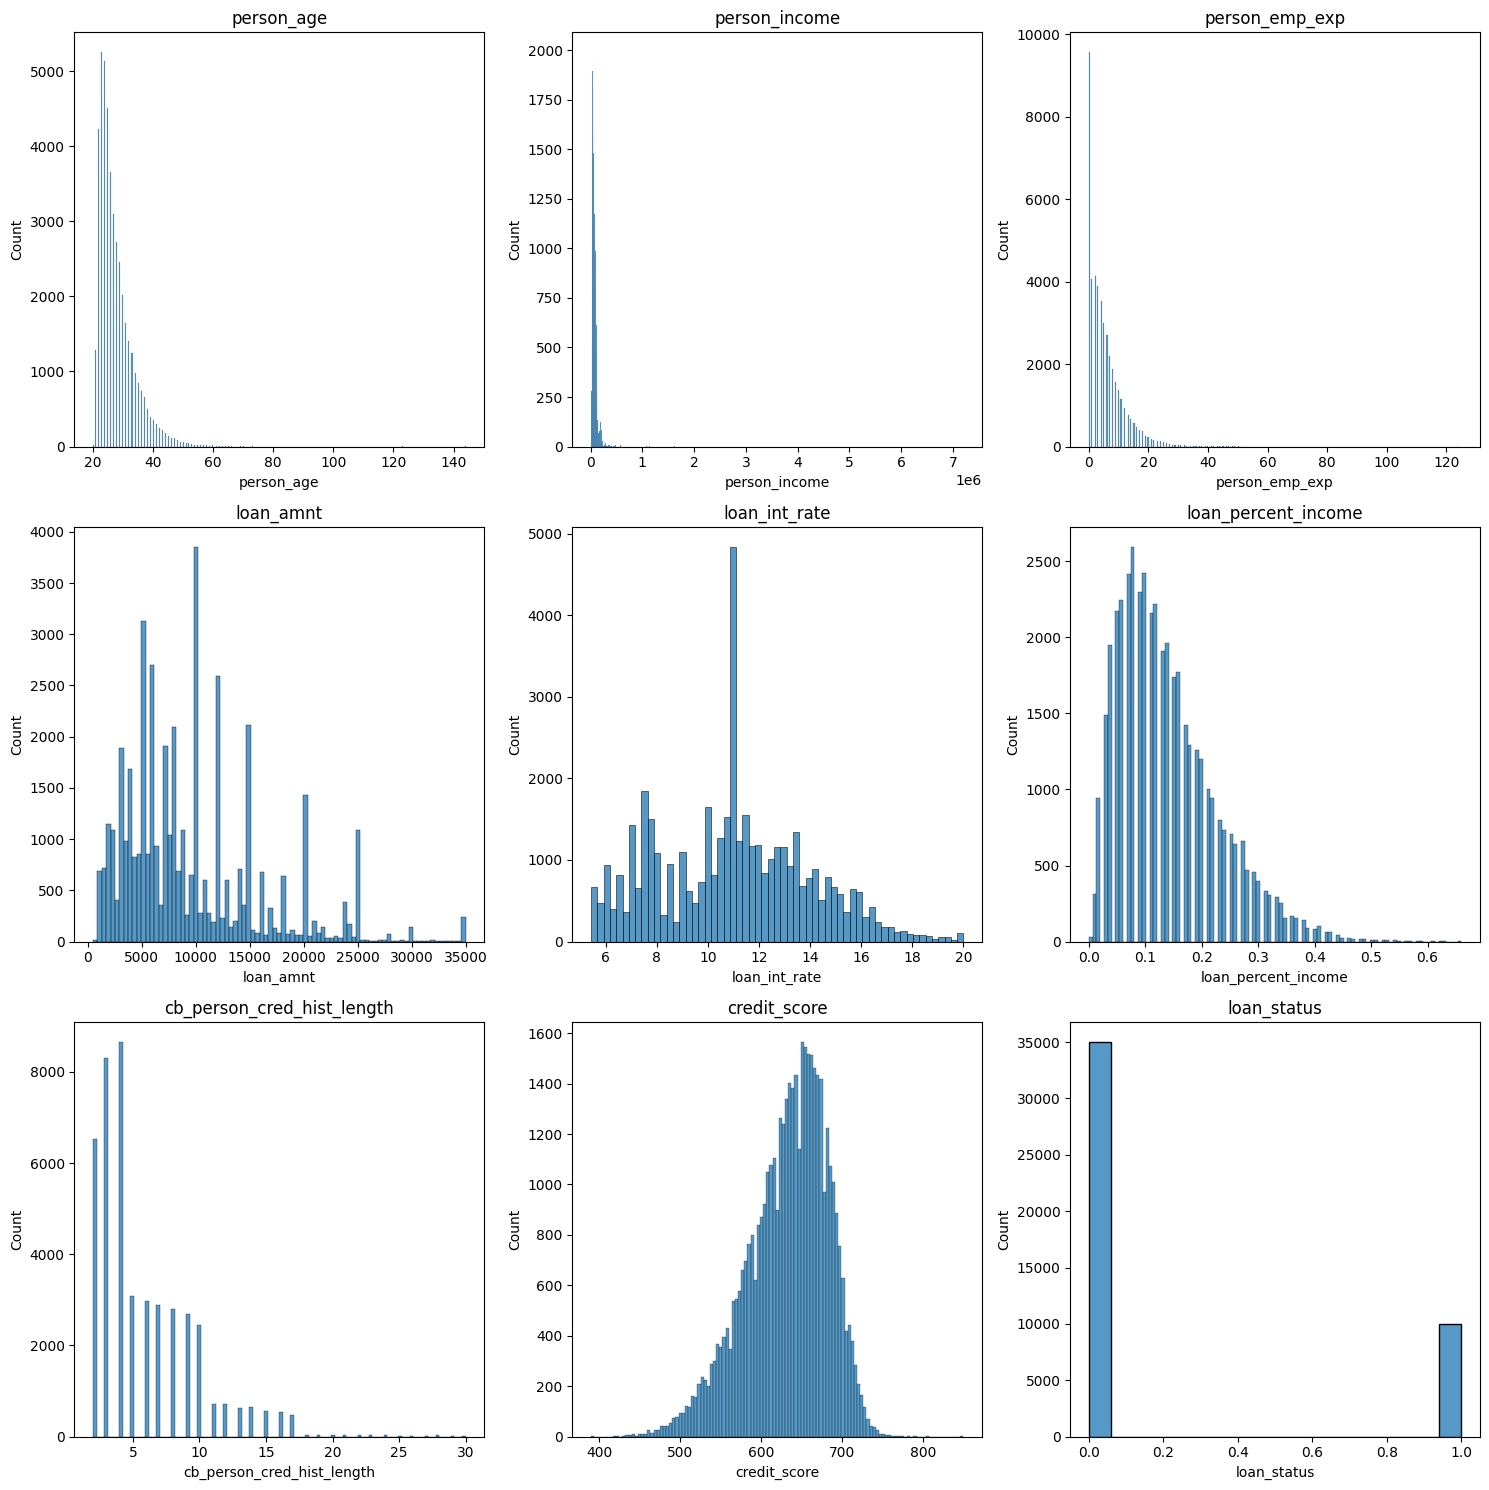

In [45]:
numerical_cols = df.select_dtypes(include='number').columns
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3  # Calculate number of rows needed (3 columns per row)

fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(numerical_cols):
    sns.histplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Target Column Distribution

<Axes: ylabel='count'>

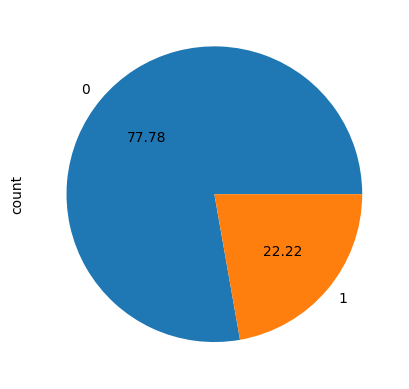

In [46]:
df['loan_status'].value_counts().plot(kind = 'pie', autopct = '%.2f')

 Our target Column class is imbalance

## Fix the Outliers

In [47]:
df = df[df['person_age'] < 100]
df = df[df['person_emp_exp'] < 90]

df.reset_index(drop=True, inplace=True)

## Feature Engineering

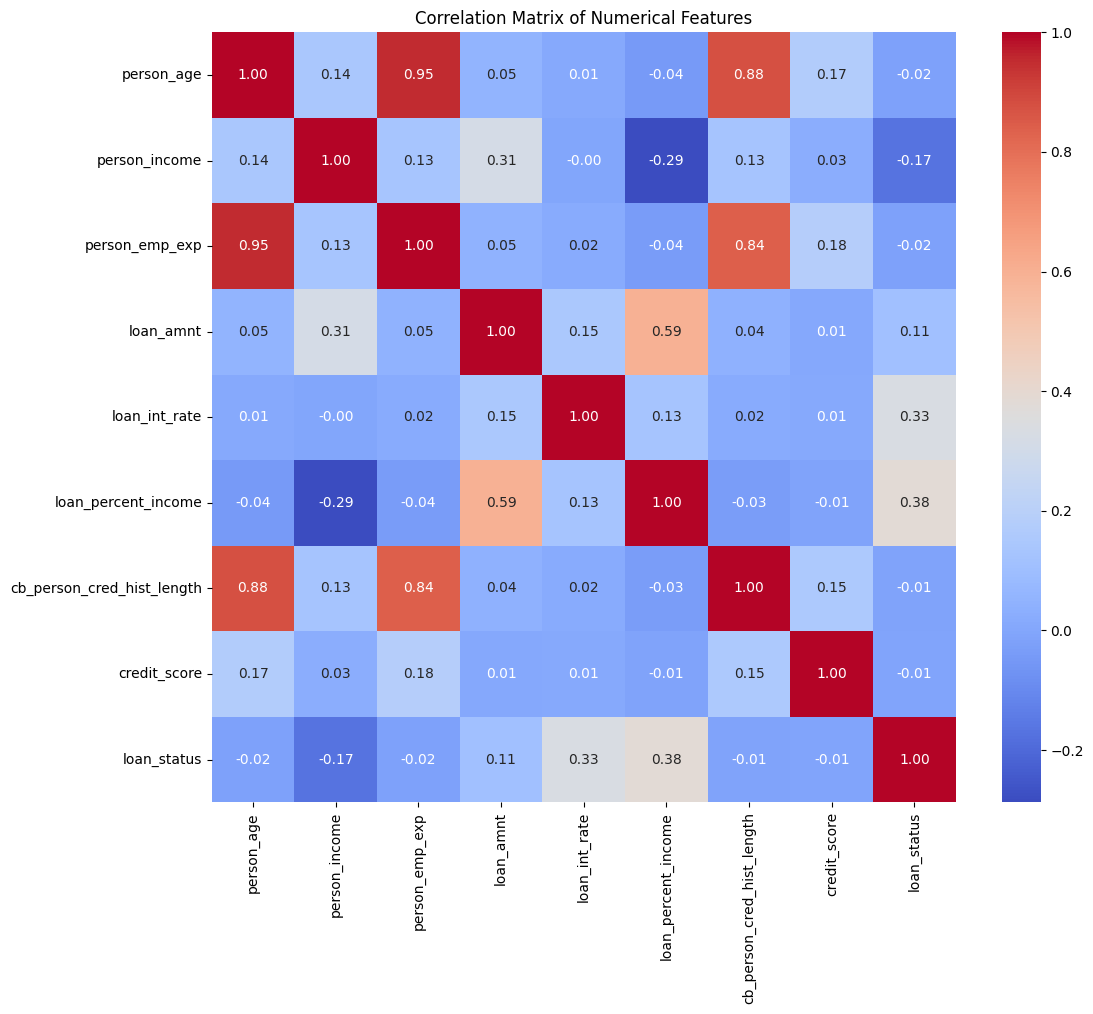

In [48]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Encoding

In [49]:
# Separate features (X) and target (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Identify categorical columns in X
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

## Correct the Class Imbalance

In [50]:
# Apply SMOTE to the encoded features
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_encoded, y)

print(f'Original target distribution:\n{y.value_counts()}')
print(f'Resampled target distribution:\n{y_res.value_counts()}')

Original target distribution:
loan_status
0    34993
1    10000
Name: count, dtype: int64
Resampled target distribution:
loan_status
1    34993
0    34993
Name: count, dtype: int64


## Split the data

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2)

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)

# Transform both train and test using the same scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Apply different models

In [56]:
models = {
    'Linear Regression': LogisticRegression(max_iter=1000), # Increased max_iter for convergence
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

max_score = 0 # Initialize max_score outside the loop
best_model_name = "" # Initialize best_model_name

for x,y in models.items():
  md = y
  # Train the model
  md.fit(X_train_scaled, y_train)

  # Predict the model on X_test_scaled
  y_pred = md.predict(X_test_scaled) # Store predictions and use scaled test data

  # Calclulate the accuracy score
  score = accuracy_score(y_test, y_pred) # Compare y_test with y_pred

  if score > max_score:
    max_score = score
    best_model_name = x

print(f"Best model is: {best_model_name} with accuracy score of {max_score:.4f}")


Best model is: Random Forest with accuracy score of 0.9475


## So the best model is Random Forest

## Store the Models using the pikle

In [60]:
# Get the best model object using the best_model_name
best_model = models[best_model_name]

# Define the filename for the pickled model
model_filename = 'best_loan_status_model.pkl'

# Save the model using pickle
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"The best model ('{best_model_name}') has been saved to '{model_filename}'.")

The best model ('Random Forest') has been saved to 'best_loan_status_model.pkl'.
